
## In this notebook:

* Final Selected Model: RF 
* Feature set 5 
* Data: chromosomes 2, 3, 4 
* labels: Pathogenic, Benign
* requires: /pickled/chr2-4_featureset5.pkl 
* note: this is the same notebook as 41.5.2_4.RF

In [7]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split


## pull in pickled dataframe:
df = pd.read_pickle("./pickled/chr2-4_featureset5.pkl")

print("Shape of entire loaded dataset", df.shape)

## Print out distribution of labels
print("TOTAL SUM OF LABELS: \n", df['Problematic'].value_counts())
print("PERCENT OF LABELS: \n", df['Problematic'].value_counts(normalize=True))

Shape of entire loaded dataset (13820, 14)
TOTAL SUM OF LABELS: 
 1    9863
0    3957
Name: Problematic, dtype: int64
PERCENT OF LABELS: 
 1    0.713676
0    0.286324
Name: Problematic, dtype: float64


In [10]:
## Split into train/test
data_copy = df.copy()
df_train = data_copy.sample(frac=0.75, random_state=1)
df_test = data_copy.drop(df_train.index)


print("Shape of training dataset", df_train.shape)
#print ('Training data subset\n')
#print (df_train.head(3)) 

print("Shape of testing dataset", df_test.shape)
#print ('\nTest data subset\n')
#print (df_test.head(3))


## Get labels:
train_labels = df_train.pop('Problematic')
test_labels = df_test.pop('Problematic')



Shape of training dataset (10365, 14)
Shape of testing dataset (3413, 14)
TOTAL SUM OF LABELS: 
 1    7393
0    2972
Name: Problematic, dtype: int64
PERCENT OF LABELS: 
 1    0.713266
0    0.286734
Name: Problematic, dtype: float64


# Fit the Random Forest model

In [ ]:
# Final Selected Model: Random forest

forest = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight='balanced')
forest.fit(df_train, train_labels)
ax = plt.gca()
rfc_disp = plot_roc_curve(forest, df_test, test_labels, ax=ax, alpha=0.8)
plt.show()

# Evaluate the models preformance on unseen test data:

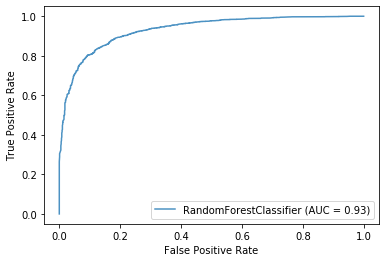

Confusion matrix: 
 [[ 710  266]
 [ 179 2258]]
Accuracy: 0.8696161734544389
Recall TP/(TP+FN): [0.72745902 0.92654904]
Precision TP/(TP+FP): [0.79865017 0.89461173]
F1: [0.7613941  0.91030034]


In [14]:

## ROC
ax = plt.gca()
rfc_disp = plot_roc_curve(forest, df_test, test_labels, ax=ax, alpha=0.8)
plt.show()

## metrics:
y_true = test_labels.to_numpy()
y_pred = forest.predict(df_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion matrix: \n", confusion_matrix(y_true, y_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_true, y_pred))

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average=None)
print("Recall TP/(TP+FN):", recall)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average=None)
print("Precision TP/(TP+FP):",precision)


# F1 score
F1 = 2 * (precision * recall) / (precision + recall)
print("F1:", F1)

# Inspecting the feature importance

Feature ranking:


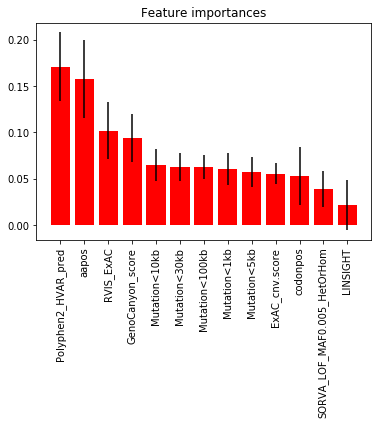

In [12]:

## Get at and plot the feature importance (tutorial: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
feature_labels = list(df_train) # columns names
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

## Print the detailed feature ranking and values if curious:
# print("Feature ranking:")
#for f in range(df_train.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
#    print(feature_labels[indices[f]])

    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_train.shape[1]), labels=df_train.columns[indices], rotation=90)
plt.xlim([-1, df_train.shape[1]])
plt.show()